In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read csv files

cause_of_death_csv = pd.read_csv("cause_of_deaths.csv")
population_csv = pd.read_csv("POP_TOTAL_DS2_en_v2.csv", skiprows=4)

cause_of_death = pd.DataFrame(cause_of_death_csv)
#cause_of_death_csv
population_csv.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55435.0,56226.0,56697.0,57029.0,57360.0,...,101342.0,101416.0,101597.0,101936.0,102393.0,102921.0,103441.0,103889.0,NaN,NaN
1,Andorra,AND,"Population, total",SP.POP.TOTL,13414.0,14376.0,15376.0,16410.0,17470.0,18551.0,...,85616.0,85474.0,84419.0,82326.0,79316.0,75902.0,72786.0,70473.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8994793.0,9164945.0,9343772.0,9531555.0,9728645.0,9935358.0,...,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0,NaN,NaN
3,Angola,AGO,"Population, total",SP.POP.TOTL,5270844.0,5367287.0,5465905.0,5565808.0,5665701.0,5765025.0,...,19842251.0,20520103.0,21219954.0,21942296.0,22685632.0,23448202.0,24227524.0,25021974.0,NaN,NaN
4,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2904780.0,2900247.0,2896652.0,2893654.0,2889167.0,NaN,NaN


In [2]:
#can we group by continent first? 
countries_continents = pd.read_csv('countries_continents.csv')

del countries_continents['Unnamed: 0']
countries_continents


#merge the continents and cause death df
cause_of_death = pd.merge(cause_of_death, countries_continents, how = 'left', left_on=['Country/Territory'], right_on=['Country'])
cause_of_death

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Continent,Country
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,338,2054,4154,5945,2673,5005,323,2985,Asia,Afghanistan
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,351,2119,4472,6050,2728,5120,332,3092,Asia,Afghanistan
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,386,2404,5106,6223,2830,5335,360,3325,Asia,Afghanistan
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,425,2797,5681,6445,2943,5568,396,3601,Asia,Afghanistan
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,451,3038,6001,6664,3027,5739,420,3816,Asia,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,381,2990,2373,2751,1956,4202,632,146,Africa,Zimbabwe
6116,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,393,3027,2436,2788,1962,4264,648,146,Africa,Zimbabwe
6117,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,398,2962,2473,2818,2007,4342,654,144,Africa,Zimbabwe
6118,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,400,2890,2509,2849,2030,4377,657,139,Africa,Zimbabwe


In [3]:
#clean up population df
population = pd.DataFrame(population_csv)
population_drop = population.drop(population.iloc[:, 3:34], axis=1)
population_drop.head()

,Country Name,Country Code,Indicator Name,1990,1991,1992,1993,1994,1995,1996,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,"Population, total",62148.0,64623.0,68235.0,72498.0,76700.0,80326.0,83195.0,...,101342.0,101416.0,101597.0,101936.0,102393.0,102921.0,103441.0,103889.0,NaN,NaN
1,Andorra,AND,"Population, total",54511.0,56674.0,58904.0,61003.0,62707.0,63854.0,64291.0,...,85616.0,85474.0,84419.0,82326.0,79316.0,75902.0,72786.0,70473.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",12067570.0,12789374.0,13745630.0,14824371.0,15869967.0,16772522.0,17481800.0,...,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0,NaN,NaN
3,Angola,AGO,"Population, total",11127870.0,11472173.0,11848971.0,12246786.0,12648483.0,13042666.0,13424813.0,...,19842251.0,20520103.0,21219954.0,21942296.0,22685632.0,23448202.0,24227524.0,25021974.0,NaN,NaN
4,Albania,ALB,"Population, total",3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,...,2947314.0,2927519.0,2913021.0,2904780.0,2900247.0,2896652.0,2893654.0,2889167.0,NaN,NaN


In [4]:
#clean up population df
cleaned_population = population_drop.drop(['2016', 'Unnamed: 61'], axis=1)
cleaned_population.head()

,Country Name,Country Code,Indicator Name,1990,1991,1992,1993,1994,1995,1996,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,"Population, total",62148.0,64623.0,68235.0,72498.0,76700.0,80326.0,83195.0,...,100830.0,101218.0,101342.0,101416.0,101597.0,101936.0,102393.0,102921.0,103441.0,103889.0
1,Andorra,AND,"Population, total",54511.0,56674.0,58904.0,61003.0,62707.0,63854.0,64291.0,...,83373.0,84878.0,85616.0,85474.0,84419.0,82326.0,79316.0,75902.0,72786.0,70473.0
2,Afghanistan,AFG,"Population, total",12067570.0,12789374.0,13745630.0,14824371.0,15869967.0,16772522.0,17481800.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
3,Angola,AGO,"Population, total",11127870.0,11472173.0,11848971.0,12246786.0,12648483.0,13042666.0,13424813.0,...,18541467.0,19183907.0,19842251.0,20520103.0,21219954.0,21942296.0,22685632.0,23448202.0,24227524.0,25021974.0
4,Albania,ALB,"Population, total",3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,...,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2904780.0,2900247.0,2896652.0,2893654.0,2889167.0


In [5]:
population_total = cleaned_population.rename(columns={"Country Name": "Country/Territory"})
population_total.head()

,Country/Territory,Country Code,Indicator Name,1990,1991,1992,1993,1994,1995,1996,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,"Population, total",62148.0,64623.0,68235.0,72498.0,76700.0,80326.0,83195.0,...,100830.0,101218.0,101342.0,101416.0,101597.0,101936.0,102393.0,102921.0,103441.0,103889.0
1,Andorra,AND,"Population, total",54511.0,56674.0,58904.0,61003.0,62707.0,63854.0,64291.0,...,83373.0,84878.0,85616.0,85474.0,84419.0,82326.0,79316.0,75902.0,72786.0,70473.0
2,Afghanistan,AFG,"Population, total",12067570.0,12789374.0,13745630.0,14824371.0,15869967.0,16772522.0,17481800.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
3,Angola,AGO,"Population, total",11127870.0,11472173.0,11848971.0,12246786.0,12648483.0,13042666.0,13424813.0,...,18541467.0,19183907.0,19842251.0,20520103.0,21219954.0,21942296.0,22685632.0,23448202.0,24227524.0,25021974.0
4,Albania,ALB,"Population, total",3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,...,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2904780.0,2900247.0,2896652.0,2893654.0,2889167.0


In [6]:
# Convert to long format
year = list(population_total.columns)[3:]
years = pd.melt(population_total, id_vars=["Country/Territory"], value_vars=year, value_name='Total Population', 
                var_name='Year')
complete = years.sort_values(by=['Country/Territory', 'Year'])
complete.head()

,Country/Territory,Year,Total Population
2,Afghanistan,1990,12067570.0
266,Afghanistan,1991,12789374.0
530,Afghanistan,1992,13745630.0
794,Afghanistan,1993,14824371.0
1058,Afghanistan,1994,15869967.0


In [7]:
# Merge data of csv file
death_cause = cause_of_death['Year']=cause_of_death['Year'].astype(str)
merge_data = pd.merge(cause_of_death, complete, on=['Country/Territory', 'Year'], how="left")

#clean up population df
death_and_population = merge_data.dropna()
death_and_population

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Continent,Country,Total Population
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2054,4154,5945,2673,5005,323,2985,Asia,Afghanistan,12067570.0
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2119,4472,6050,2728,5120,332,3092,Asia,Afghanistan,12789374.0
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2404,5106,6223,2830,5335,360,3325,Asia,Afghanistan,13745630.0
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2797,5681,6445,2943,5568,396,3601,Asia,Afghanistan,14824371.0
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,3038,6001,6664,3027,5739,420,3816,Asia,Afghanistan,15869967.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6111,Zimbabwe,ZWE,2011,1803,722,211,3013,3479,743,1222,...,2983,2335,2721,2062,4136,615,152,Africa,Zimbabwe,14255592.0
6112,Zimbabwe,ZWE,2012,1586,724,209,3095,2763,754,1243,...,3065,2328,2708,2011,4132,622,152,Africa,Zimbabwe,14565482.0
6113,Zimbabwe,ZWE,2013,1448,731,209,3017,3544,732,1241,...,2987,2289,2693,1964,4107,612,148,Africa,Zimbabwe,14898092.0
6114,Zimbabwe,ZWE,2014,1422,741,212,2977,3685,734,1257,...,2948,2302,2715,1952,4138,615,146,Africa,Zimbabwe,15245855.0


In [8]:
#add a new col for percentage using population values
for disease in death_and_population.columns[3:-5]:
    title = disease + ' Percentage'
    
    death_and_population[title] = (death_and_population[disease] / death_and_population['Total Population']) * 100

death_and_population

C:\Users\panth\AppData\Local\Temp\ipykernel_14088\1056306797.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_and_population[title] = (death_and_population[disease] / death_and_population['Total Population']) * 100
C:\Users\panth\AppData\Local\Temp\ipykernel_14088\1056306797.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_and_population[title] = (death_and_population[disease] / death_and_population['Total Population']) * 100
C:\Users\panth\AppData\Local\Temp\ipykernel_14088\1056306797.py:

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Neoplasms Percentage,Conflict and Terrorism Percentage,Diabetes Mellitus Percentage,Chronic Kidney Disease Percentage,Poisonings Percentage,Protein-Energy Malnutrition Percentage,Road Injuries Percentage,Chronic Respiratory Diseases Percentage,Cirrhosis and Other Chronic Liver Diseases Percentage,Digestive Diseases Percentage
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,0.095960,0.012347,0.017468,0.030735,0.002801,0.017021,0.034423,0.049264,0.022150,0.041475
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,0.092233,0.026350,0.016576,0.029118,0.002744,0.016568,0.034967,0.047305,0.021330,0.040033
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,0.088886,0.031603,0.015663,0.027471,0.002808,0.017489,0.037146,0.045273,0.020588,0.038812
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,0.085225,0.027630,0.014807,0.026052,0.002867,0.018868,0.038322,0.043476,0.019852,0.037560
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,0.081374,0.056453,0.014058,0.024776,0.002842,0.019143,0.037814,0.041991,0.019074,0.036163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6111,Zimbabwe,ZWE,2011,1803,722,211,3013,3479,743,1222,...,0.072715,0.000035,0.020673,0.014016,0.002511,0.020925,0.016380,0.019087,0.014464,0.029013
6112,Zimbabwe,ZWE,2012,1586,724,209,3095,2763,754,1243,...,0.071772,0.000069,0.020391,0.013759,0.002513,0.021043,0.015983,0.018592,0.013807,0.028368
6113,Zimbabwe,ZWE,2013,1448,731,209,3017,3544,732,1241,...,0.070976,0.000054,0.020184,0.013512,0.002430,0.020050,0.015364,0.018076,0.013183,0.027567
6114,Zimbabwe,ZWE,2014,1422,741,212,2977,3685,734,1257,...,0.071213,0.000033,0.020294,0.013492,0.002407,0.019336,0.015099,0.017808,0.012803,0.027142


In [9]:
#plot all the continents at once using percentages: 

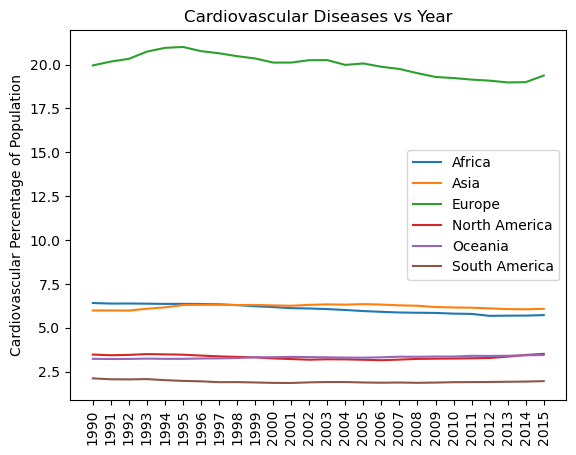

In [10]:
continent_year = death_and_population[death_and_population['Year'] == '1990'].groupby('Continent').count()
continent_year

#repeat for all the continents 
continents = death_and_population.groupby('Continent').sum()
continents
for continent in continents.index:
    #print(continent)
    cause_continent = death_and_population[death_and_population['Continent'] == continent]
    year_continent = cause_continent.groupby('Year').sum()
    plt.plot(year_continent.index, year_continent['Cardiovascular Diseases Percentage'])

plt.legend(continent_year.index)
plt.title('Cardiovascular Diseases vs Year')
plt.ylabel('Cardiovascular Percentage of Population')
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.show()

In [11]:
#why does europe have such a high rate of CVD?

country = death_and_population[death_and_population['Continent'] == 'Europe'].groupby('Country/Territory').sum().sort_values('Cardiovascular Diseases Percentage', ascending = False)[['Cardiovascular Diseases Percentage']].head(50)
country.head()


,Cardiovascular Diseases Percentage
Country/Territory,
Bulgaria,26.773383
Ukraine,23.340541
Serbia,21.802338
Latvia,20.921537
Georgia,20.909195


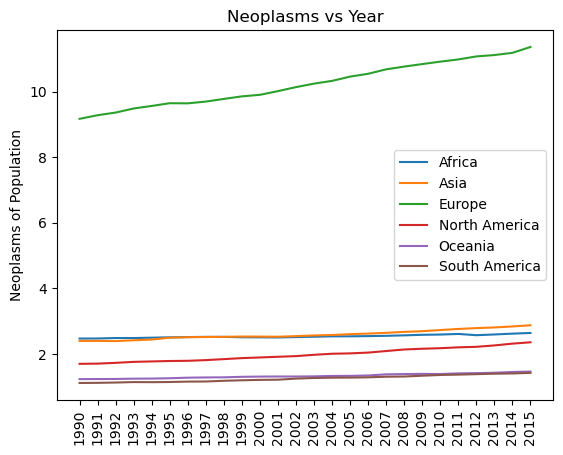

In [12]:
#try out different diseases to see which continents takes over: 

continent_year = death_and_population[death_and_population['Year'] == '1990'].groupby('Continent').count()
continent_year
#repeat for all the continents 
continents = death_and_population.groupby('Continent').sum()
continents
for continent in continents.index:
    #print(continent)
    cause_continent = death_and_population[death_and_population['Continent'] == continent]
    year_continent = cause_continent.groupby('Year').sum()
    plt.plot(year_continent.index, year_continent['Neoplasms Percentage'])

plt.legend(continent_year.index)
plt.title('Neoplasms vs Year')
plt.ylabel('Neoplasms of Population')
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.show()

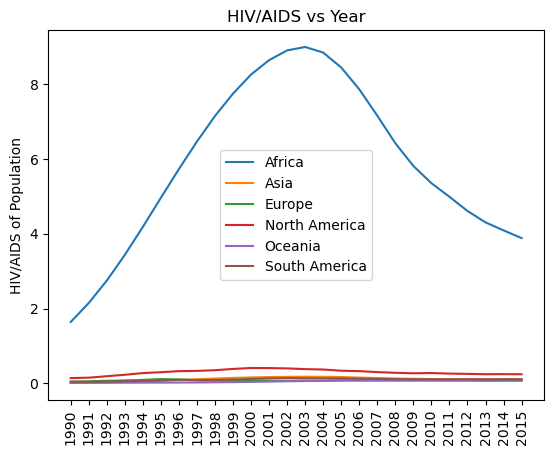

In [13]:
#this isnt surprising- bump seen is caused by south africa

continent_year = death_and_population[death_and_population['Year'] == '1990'].groupby('Continent').count()
continent_year
#repeat for all the continents 
continents = death_and_population.groupby('Continent').sum()
continents
for continent in continents.index:
    #print(continent)
    cause_continent = death_and_population[death_and_population['Continent'] == continent]
    year_continent = cause_continent.groupby('Year').sum()
    plt.plot(year_continent.index, year_continent['HIV/AIDS Percentage'])

plt.legend(continent_year.index)
plt.title('HIV/AIDS vs Year')
plt.ylabel('HIV/AIDS of Population')
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.show()

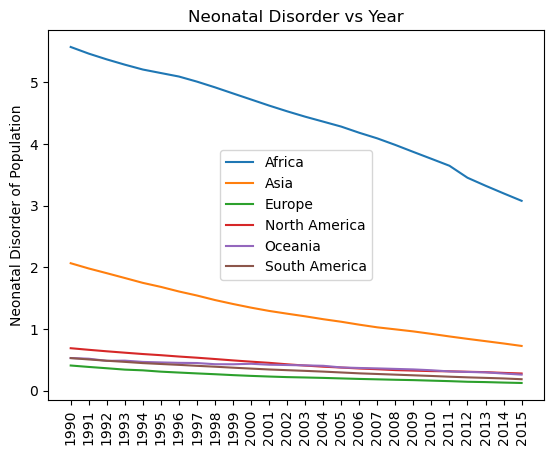

In [14]:
#cont
continent_year = death_and_population[death_and_population['Year'] == '1990'].groupby('Continent').count()
continent_year
#repeat for all the continents 
continents = death_and_population.groupby('Continent').sum()
continents
for continent in continents.index:
    #print(continent)
    cause_continent = death_and_population[death_and_population['Continent'] == continent]
    year_continent = cause_continent.groupby('Year').sum()
    plt.plot(year_continent.index, year_continent['Neonatal Disorders Percentage'])

plt.legend(continent_year.index)
plt.title('Neonatal Disorder vs Year')
plt.ylabel('Neonatal Disorder of Population')
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.show()

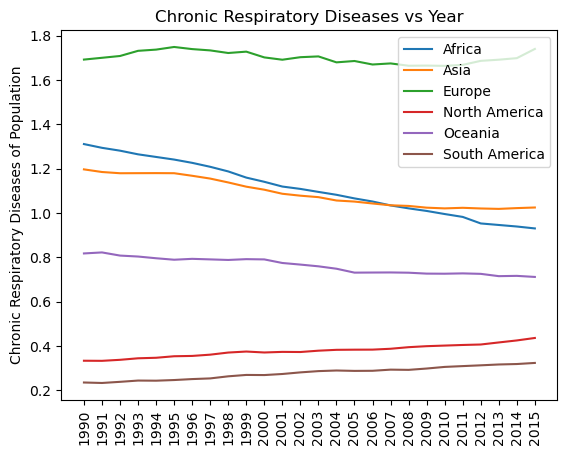

In [15]:
#cont
continent_year = death_and_population[death_and_population['Year'] == '1990'].groupby('Continent').count()
continent_year
#repeat for all the continents 
continents = death_and_population.groupby('Continent').sum()
continents
for continent in continents.index:
    #print(continent)
    cause_continent = death_and_population[death_and_population['Continent'] == continent]
    year_continent = cause_continent.groupby('Year').sum()
    plt.plot(year_continent.index, year_continent['Chronic Respiratory Diseases Percentage'])

plt.legend(continent_year.index)
plt.title('Chronic Respiratory Diseases vs Year')
plt.ylabel('Chronic Respiratory Diseases of Population')
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.show()

In [1]:
#cont
continent_year = death_and_population[death_and_population['Year'] == '1990'].groupby('Continent').count()
continent_year
#repeat for all the continents 
continents = death_and_population.groupby('Continent').sum()
continents
for continent in continents.index:
    #print(continent)
    cause_continent = death_and_population[death_and_population['Continent'] == continent]
    year_continent = cause_continent.groupby('Year').sum()
    plt.plot(year_continent.index, year_continent['Diarrheal Diseases Percentage'])

plt.legend(continent_year.index)
plt.title('Diarrheal Diseases vs Year')
plt.ylabel('Diarrheal Diseases of Population')
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.show()

NameError: name 'death_and_population' is not defined

In [2]:
print('hello')

hello
